# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

We chose the book review data set and we are predicting whether a particular book review is positive or negative (our label is 'Positive Review' -- True means positive review and False means negative review). This is a supervised learning binary classification problem. The feature is the 'Review'. This is an important problem because it allows a reader to know if a book has had generally good or bad feedback. Also, book publishing companies could use this model to detect whether or not a book is worth publishing based on positive/negative reviews.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
df.isna().sum() # no null/empty values
df.columns.has_duplicates # no duplicates
# feature and label column names look good and are relevant
df.shape # 1973 rows & 2 columns
# no categorical features so cannot use one-hot encoding

(1973, 2)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

This is a supervised learning binary classification problem (label is 'Positive Review'). Our feature list is still the 'Review' column. We will create labeled examples from the data set to split the main data set into a training and testing data set. We will use a Sequential model for our neural network to perform sentiment analysis. We will use the TfidVectorizer to transform the input training and testing data (X_train, X_test) and will create input, hidden, and output layers for our neural network (implementing Dropout layers too) to produce a model that generalized well to new data. We will then define the optimization function and the loss function, compile the model, and evaluate and visualize the model's performance on the test set over time. In order to select the most efficient and effective model, we will adjust the number of epochs, learning rate, number of hidden layers, units parameter, and dropout layers.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

2025-07-30 23:44:04.108321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 23:44:04.108360: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

X_train:  (1479,)
y_train:  (1479,)
X_test:  (494,)
X_test:  (494,)
Vocabulary_size:  18558
Epoch [5/ 30], Loss: 0.9614, Accuracy: 0.5816, Val_loss: 0.6905, Val_accuracy: 0.5101
Epoch [10/ 30], Loss: 0.8604, Accuracy: 0.7177, Val_loss: 0.6800, Val_accuracy: 0.5101
Epoch [15/ 30], Loss: 0.9417, Accuracy: 0.7244, Val_loss: 0.5113, Val_accuracy: 0.8209
Epoch [20/ 30], Loss: 0.6215, Accuracy: 0.8014, Val_loss: 0.4437, Val_accuracy: 0.8007
Epoch [25/ 30], Loss: 0.7702, Accuracy: 0.8191, Val_loss: 1.0869, Val_accuracy: 0.5203
Epoch [30/ 30], Loss: 0.6828, Accuracy: 0.7988, Val_loss: 0.4216, Val_accuracy: 0.8108
Elapsed time: 3.11s


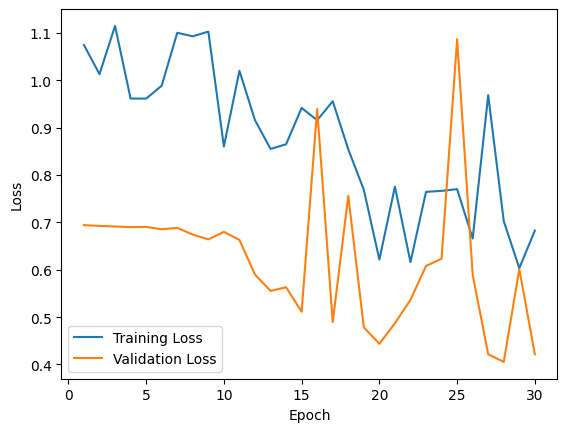

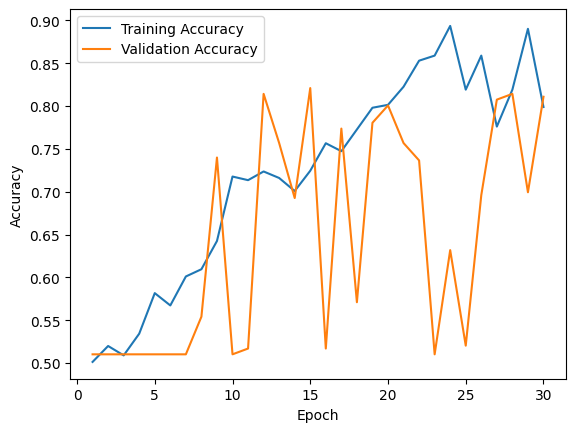

16/16 [==============================] - 0s 986us/step - loss: 0.4225 - accuracy: 0.8138
Loss:  0.42245495319366455 Accuracy:  0.8137651681900024


In [17]:
# YOUR CODE HERE

# Splitting the data set into training and testing input and output datasets.
X = df["Review"]
y = df["Positive Review"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Implementing TF-IDF vectorizer to transform the text
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("X_test: ", X_test.shape)

vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print("Vocabulary_size: ", vocabulary_size)

# Create the model object and neural network

nn_model = keras.Sequential()

input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.1))
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.1))
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.1))
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)
nn_model.add(keras.layers.Dropout(.05))

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

# Fit model to number of epochs
            
t0 = time.time() # start time
num_epochs = 30 # epochs
history = nn_model.fit(X_train_tfidf.toarray(), y_train, epochs=num_epochs, verbose=0, validation_split=0.2, callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)])
t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))

# Data visualizations of loss and accuracy

plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss and accuracy

loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

After fine-tuning the hyperparameters, I got a final loss of 0.4225 and accuracy of 0.8138. I experimented with dropout layers and the dropout rates from between 0.05 to 0.25 and also varying these values and the number/location of dropout layers. My accuracy and validation loss both improved. Next, I tried adjusting my learning rate, but the optimal value stayed at around 0.1. The units of 64, 32, and 16 were optimal for this problem and my model. My confusion matrix below shows many true positives and negatives (but not perfect so I know my model is not overfitting) which is a great sign!

In [19]:
#ADD A CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

probability_predictions = nn_model.predict(X_test_tfidf.toarray())
class_label_predictions = []

for i in range(0, len(y_test)):
    if probability_predictions[i] >= 0.5:
        class_label_predictions.append(1)
    else:
        class_label_predictions.append(0)

confusion_matrix = confusion_matrix(y_test, class_label_predictions)
confusion_matrix

array([[210,  27],
       [ 65, 192]])